In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/bmurugesan1/OneDrive - IESEG/Documents/SEM 2/FID/Indv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/bmurugesan1/OneDrive - IESEG/Documents/SEM 2/FID/Indv\Assignment_Individual (1).pdf
C:/Users/bmurugesan1/OneDrive - IESEG/Documents/SEM 2/FID/Indv\diamonds.csv
C:/Users/bmurugesan1/OneDrive - IESEG/Documents/SEM 2/FID/Indv\regression-models-diamond-price-prediction.ipynb


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [4]:
data_df = pd.read_csv("diamonds.csv")
data_df.sample(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
13901       13902   1.18      Ideal     H     SI2   62.2   56.0   5657  6.74   
40233       40234   0.39    Premium     D     VS1   61.7   59.0   1123  4.69   
44010       44011   0.51    Premium     G     VS2   61.2   60.0   1546  5.17   
35221       35222   0.33      Ideal     D    VVS2   61.7   55.0    893  4.46   
17194       17195   1.00    Premium     D     VS2   59.6   60.0   6868  6.57   
31544       31545   0.30      Ideal     E    VVS2   61.6   58.0    766  4.28   
50990       50991   0.31       Good     E     SI1   63.1   57.0    544  4.30   
7226         7227   1.04      Ideal     H     SI2   60.3   56.0   4193  6.61   
8328         8329   1.00  Very Good     E     SI2   62.5   55.0   4392  6.38   
48947       48948   0.98    Premium     H      I1   59.6   60.0   2046  6.61   

          y     z  
13901  6.76  4.20  
40233  4.64  2.88  
44010  5.12  3.15  
35221  4.49  2.76  
17194  6.52  3.90  
31544  4.33  2.65  
50990  4.35  2.73  
7226   6.58  3.98  
8328   6.41  4.00  
48947  6.48  3.89

In [5]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


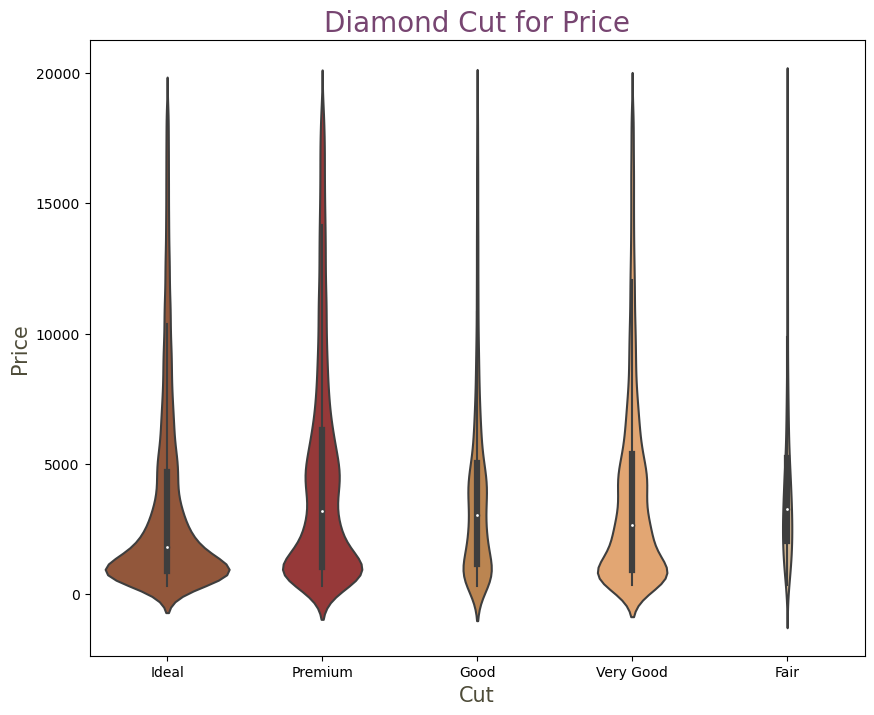

In [6]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

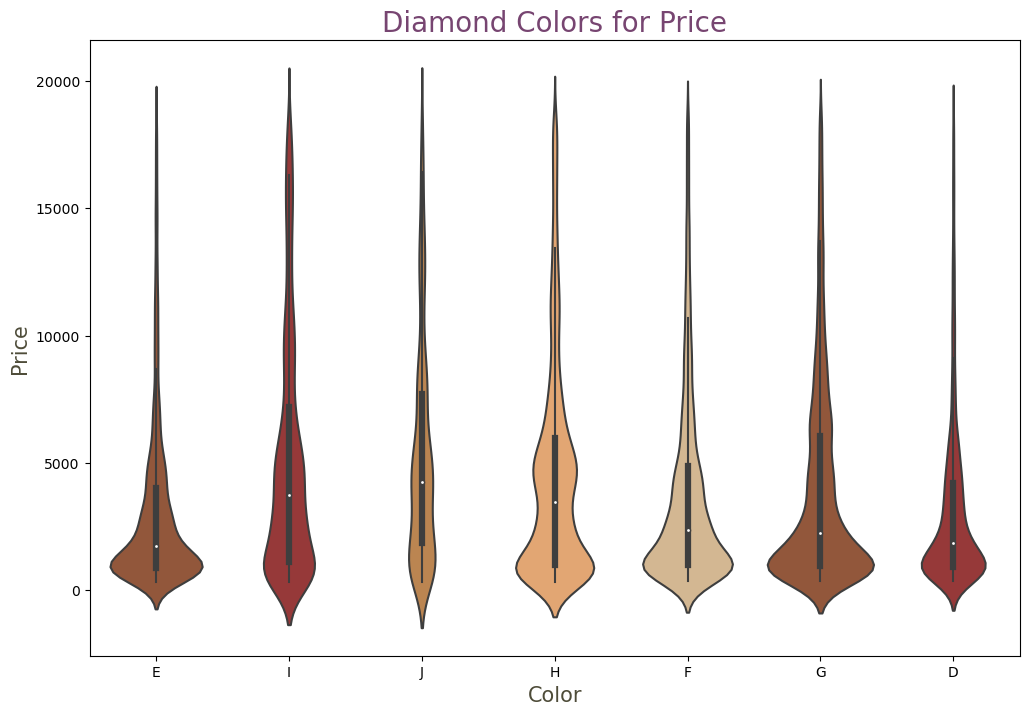

In [7]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

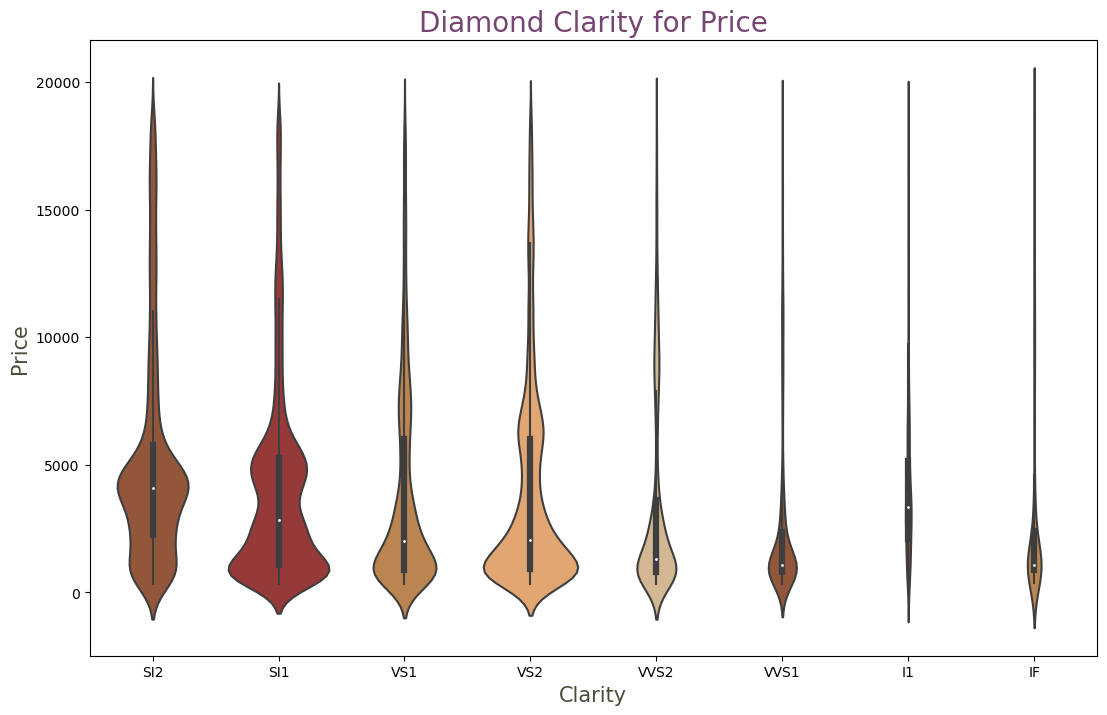

In [8]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

In [9]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

count          mean           std    min       25%       50%  \
Unnamed: 0  53940.0  26970.500000  15571.281097    1.0  13485.75  26970.50   
carat       53940.0      0.797940      0.474011    0.2      0.40      0.70   
depth       53940.0     61.749405      1.432621   43.0     61.00     61.80   
table       53940.0     57.457184      2.234491   43.0     56.00     57.00   
price       53940.0   3932.799722   3989.439738  326.0    950.00   2401.00   
x           53940.0      5.731157      1.121761    0.0      4.71      5.70   
y           53940.0      5.734526      1.142135    0.0      4.72      5.71   
z           53940.0      3.538734      0.705699    0.0      2.91      3.53   

                 75%       max  
Unnamed: 0  40455.25  53940.00  
carat           1.04      5.01  
depth          62.50     79.00  
table          59.00     95.00  
price        5324.25  18823.00  
x               6.54     10.74  
y               6.54     58.90  
z               4.04     31.80

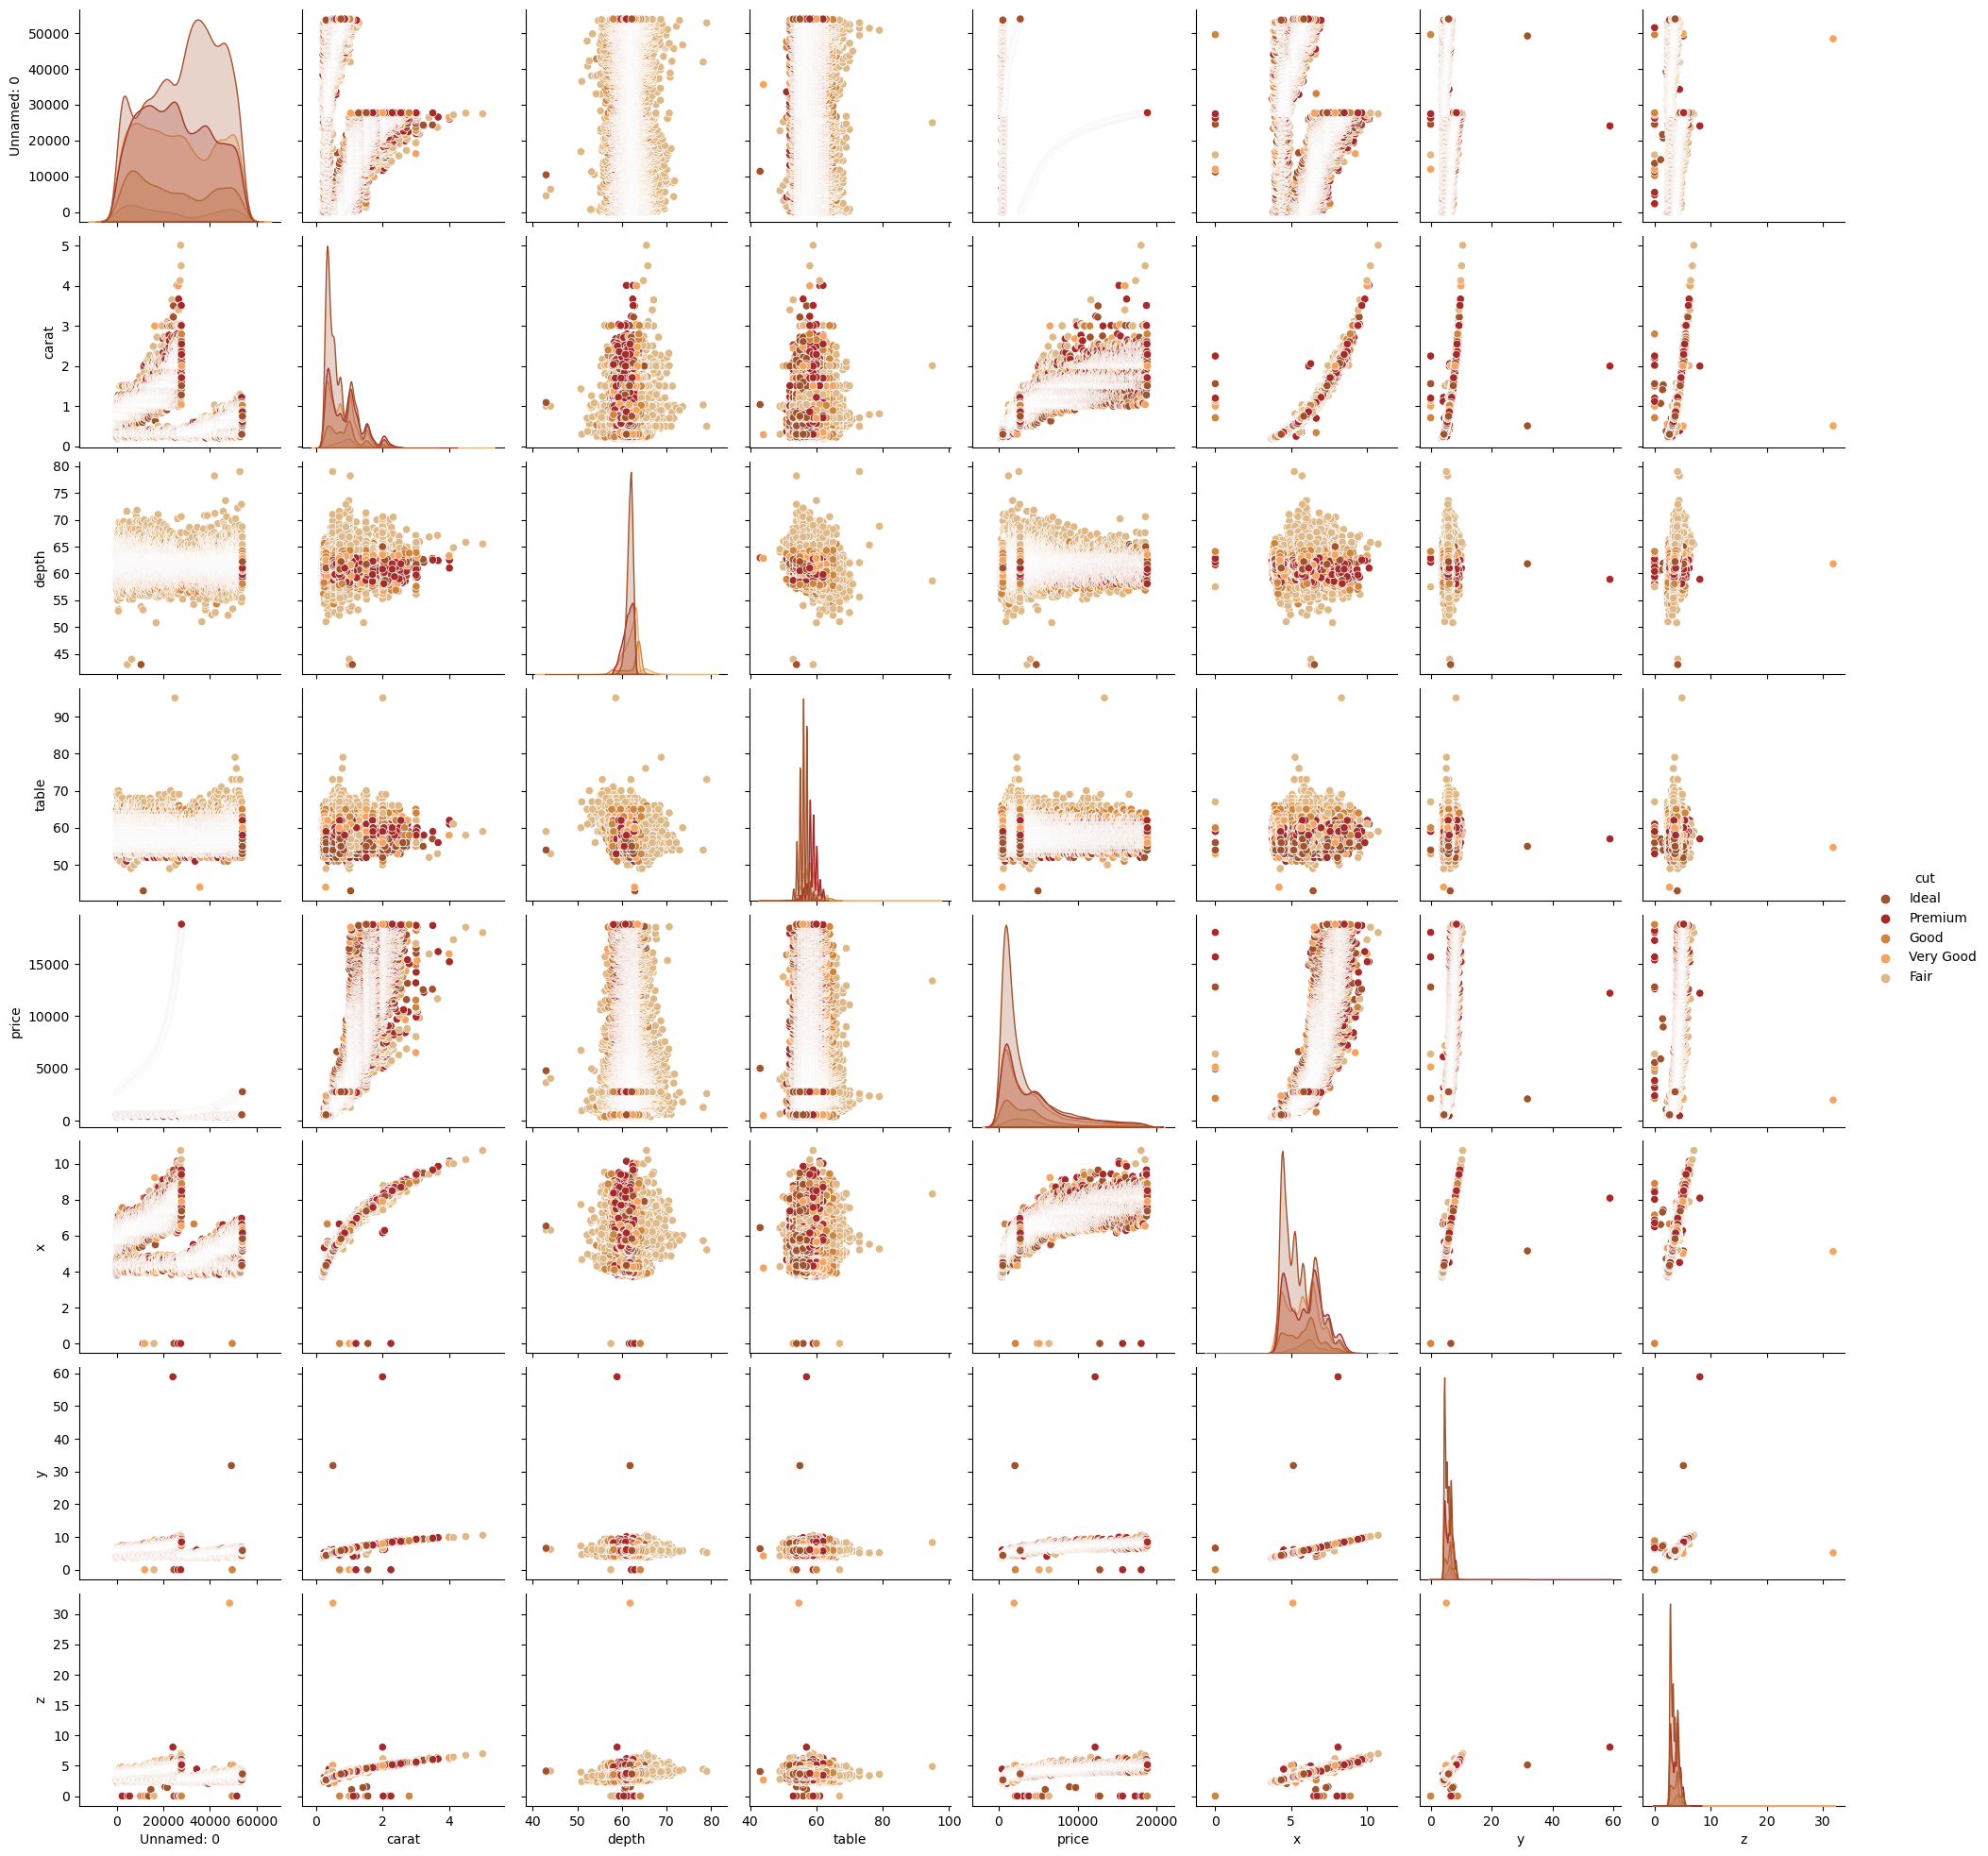

In [10]:
#Doing Bivariate Analysis by examaning a pairplot  
ax = sns.pairplot(data_df, hue= "cut", palette = cols)

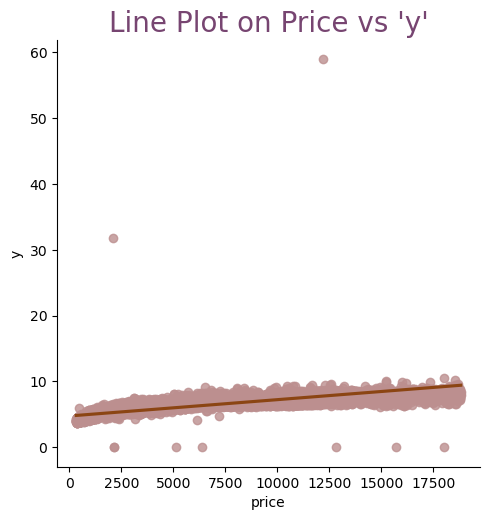

In [11]:
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

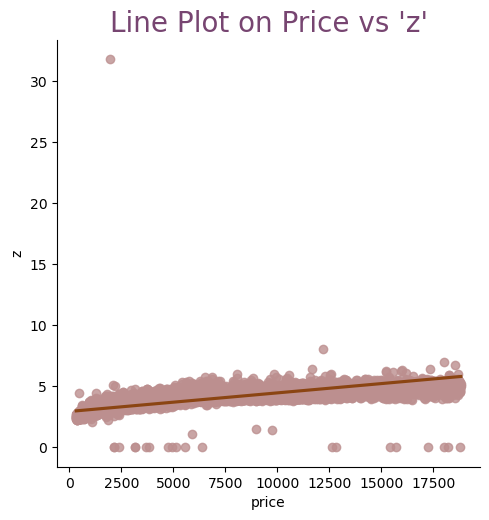

In [12]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

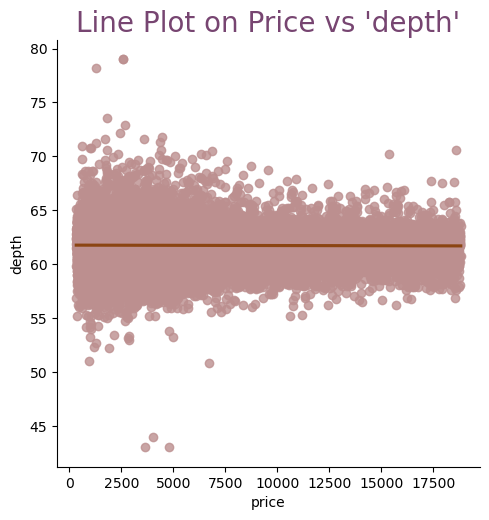

In [13]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

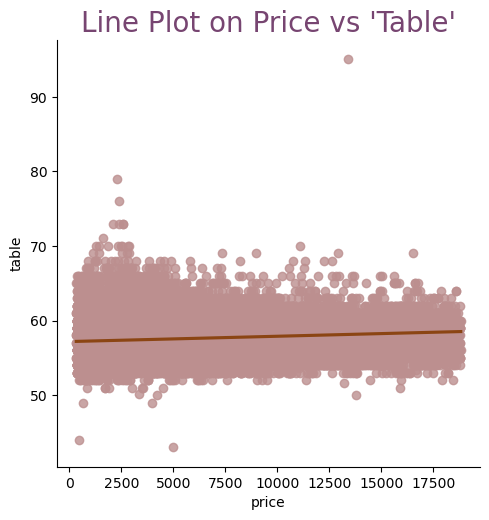

In [14]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [15]:
# Removing the feature "Unnamed"
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [16]:
# Removing the datapoints having min 0 value in either x, y or z features 
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

In [17]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape 

(53909, 10)

In [18]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

carat           cut         color       clarity         depth  \
count  53909.000000  53909.000000  53909.000000  53909.000000  53909.000000   
mean       0.797617      2.553396      2.593964      3.835575     61.749743   
std        0.473759      1.027444      1.701283      1.724540      1.420093   
min        0.200000      0.000000      0.000000      0.000000     50.800000   
25%        0.400000      2.000000      1.000000      2.000000     61.000000   
50%        0.700000      2.000000      3.000000      4.000000     61.800000   
75%        1.040000      3.000000      4.000000      5.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     73.600000   

              table         price             x             y             z  
count  53909.000000  53909.000000  53909.000000  53909.000000  53909.000000  
mean      57.455852   3930.513680      5.731441      5.733764      3.539994  
std        2.226169   3987.145802      1.119369      1.116891      0.702085  
min       43.000000    326.000000      3.730000      3.680000      2.060000  
25%       56.000000    949.000000      4.710000      4.720000      2.910000  
50%       57.000000   2400.000000      5.700000      5.710000      3.530000  
75%       59.000000   5322.000000      6.540000      6.540000      4.040000  
max       79.000000  18823.000000     10.740000     31.800000     31.800000

<Axes: >

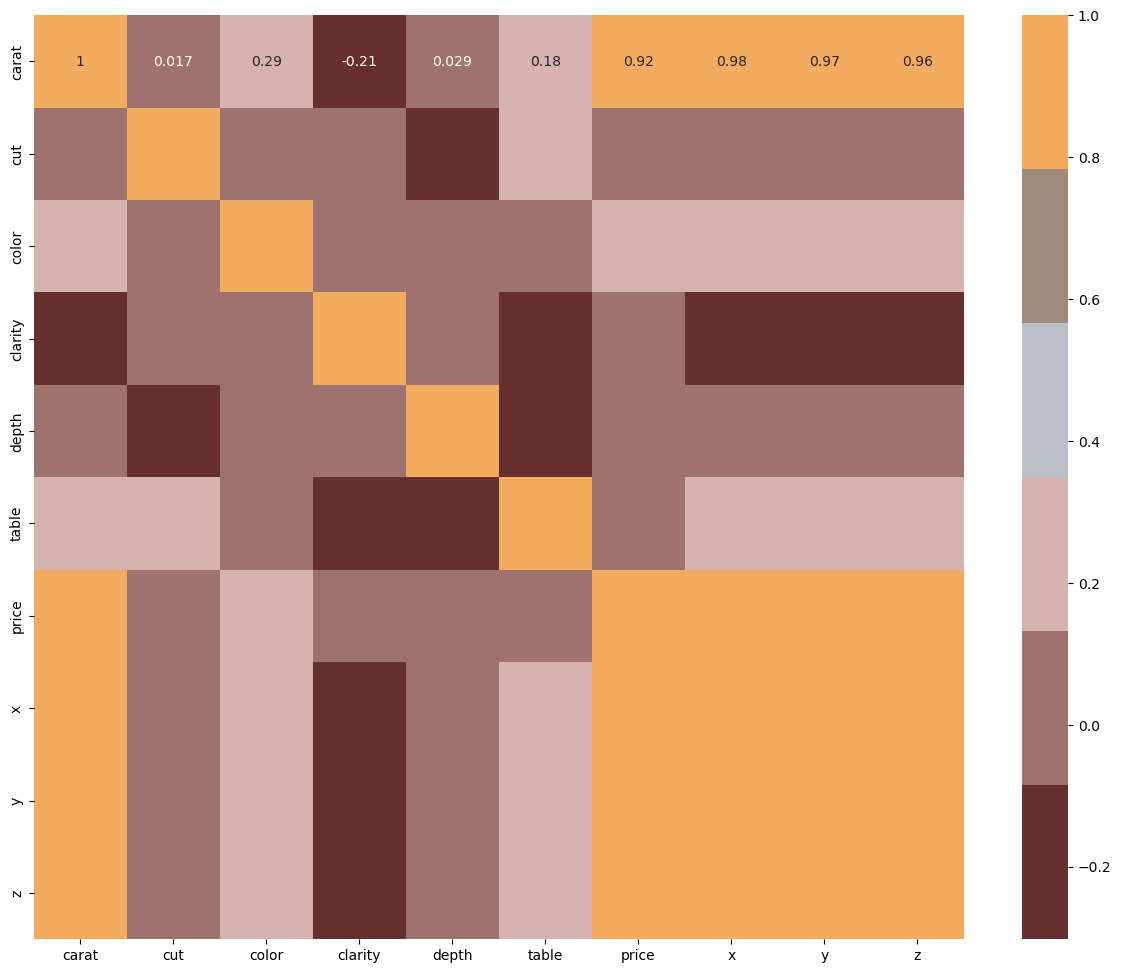

In [19]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

The heatmap provides a comprehensive overview of how different characteristics of diamonds relate to each other. It shows that while the physical size of a diamond (carat, dimensions) plays a crucial role in its valuation, other features like cut, color, and clarity also contribute but to a lesser extent

In [20]:
# Defining the independent and dependent variables
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [21]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [22]:
pipeline_rf

Pipeline(steps=[('scalar4', StandardScaler()), ('rf', RandomForestRegressor())])

In [23]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 
Lasso: 1366.991298 
DecisionTree: 736.011118 
RandomForest: 549.238994 
KNeighbors: 816.559263 
XGBRegressor: 548.346850 


In [24]:
# Model prediction on test data with XGBClassifier which gave us the least RMSE 
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9821291192884176
Adjusted R^2: 0.9821141881775372


### Interupreting The Model

In [25]:

from sklearn.inspection import PartialDependenceDisplay


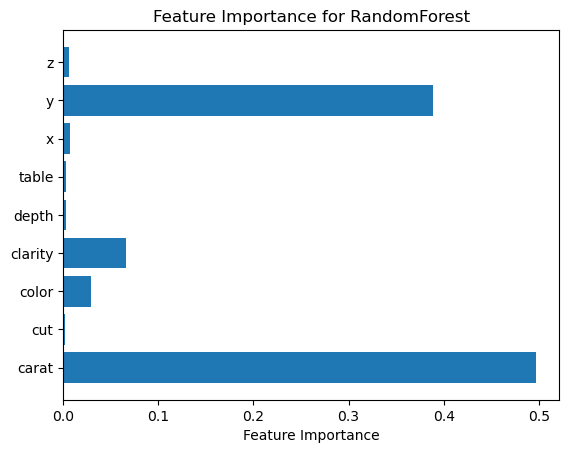

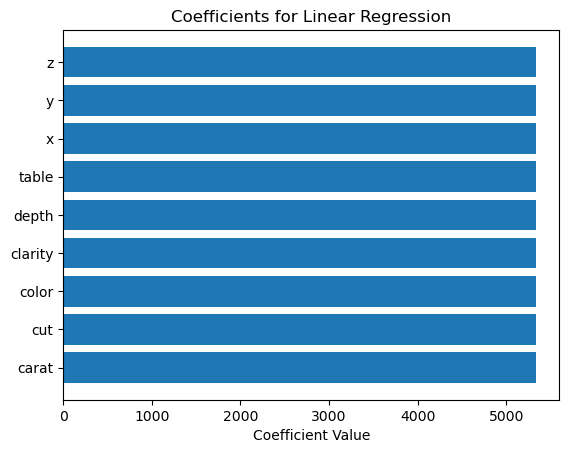

In [26]:
# Random Forest Feature Importance
rf_feature_importance = pipeline_rf.named_steps['rf'].feature_importances_
features = X_train.columns
plt.barh(features, rf_feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for RandomForest")
plt.show()

# Linear Regression Coefficients
lr_coefficients = pipeline_lr.named_steps['lr'].coef_[0]  # Assuming it's a single class or binary classification
plt.barh(features, lr_coefficients)
plt.xlabel("Coefficient Value")
plt.title("Coefficients for Linear Regression")
plt.show()


The `carat` feature has the highest importance by far, significantly influencing the model's predictions or decisions, followed by the 'y' dimension.

>Carat: 

This feature has the highest coefficient, suggesting that it has the strongest positive influence on the model's output. The value of a diamond is highly sensitive to changes in carat weight.

>Cut, Color, Clarity: 

These quality-related features also have significant coefficients, though less than carat, meaning changes in these features notably affect the model’s predictions but to a lesser extent than carat.

>Dimensions (x, y, z): 

Dimensions also show considerable influence, particularly the y dimension, indicating that larger diamonds tend to have higher values.
In summary, this chart illustrates that the physical size (especially the carat weight) and quality characteristics of diamonds have substantial impacts on their evaluated worth according to this model. 

In [27]:
!pip install -U scikit-learn

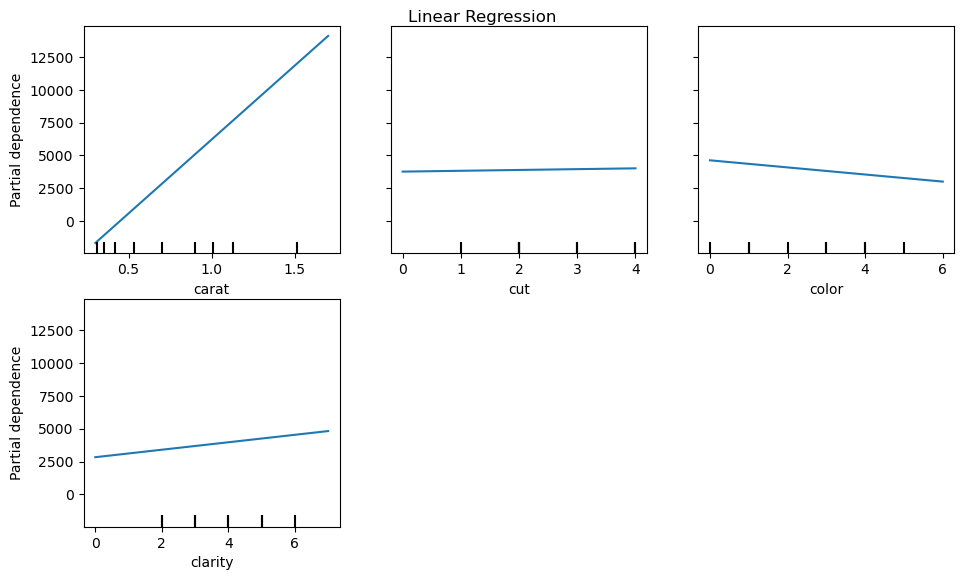

In [36]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
# Plot Partial Dependence for logistic regression
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    estimator=pipeline_lr,
    X=X_train,
    features=(0, 1, 2, 3),  # Choose features by their indices
    ax=ax
)
fig.tight_layout(pad=2.0)
fig.suptitle("Linear Regression")
plt.show()

>Carat: 

The plot for carat shows a clear upward trend, indicating that as the carat weight of a diamond increases, its value also increases significantly. This relationship is linear and strong, suggesting that carat is a powerful predictor in the model.

>Cut: 

The plot for cut shows a relatively flat line, which suggests that within this model, the cut of the diamond does not have a strong impact on its value. The value does not vary much with changes in the cut grade.

>Color: 

The color plot displays a slight downward trend, indicating that as the color grade improves (i.e., as the numerical value representing color decreases), the value of the diamond slightly decreases. This is contrary to typical expectations where better color correlates with higher value, suggesting that other features might be interacting with color in a way that affects its impact on the value.

>Clarity: 

The clarity plot shows a slight upward trend, suggesting that as clarity improves, the diamond’s value increases slightly. However, the impact is relatively modest compared to the effect of carat.

These plots help in understanding the individual effect of each feature while controlling for the influence of other variables in the dataset. This visualization is particularly useful for stakeholders to understand how different features of diamonds impact their assessed value in the predictive model.

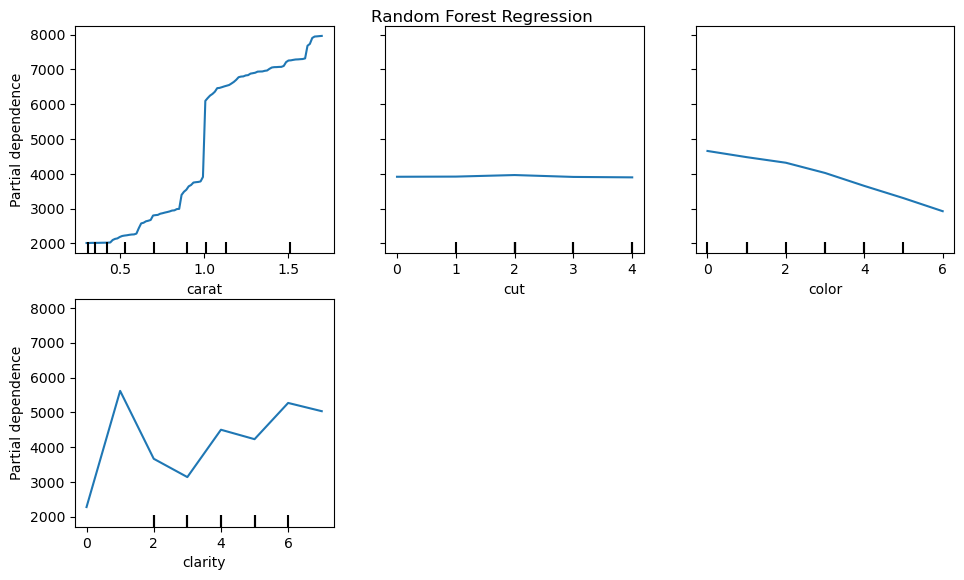

In [29]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
# Plot Partial Dependence for logistic regression
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    estimator=pipeline_rf,
    X=X_train,
    features=([0, 1, 2, 3]),  # Choose features by their indices
    ax=ax
)
fig.tight_layout(pad=2.0)
fig.suptitle("Random Forest Regression")
plt.show()

>Carat: 

Unlike the linear trend seen in the linear regression model, the partial dependence plot for carat in the Random Forest model shows a more complex, non-linear relationship. There are noticeable steps or jumps, especially as the carat size increases, indicating that the value significantly jumps at certain thresholds. This non-linear pattern suggests that Random Forest captures more detailed interactions and thresholds than a simple linear model.

>Cut: 

The plot for cut remains relatively flat, similar to the linear regression model, implying that cut has a minimal impact on the diamond's price according to this model. It suggests that for the range of cut grades available in the data, there isn't a significant variation in price attributable directly to cut when other factors are averaged out.

>Color: 

This plot shows a downward trend, indicating that as the color grade improves (i.e., the numerical value decreases), the price of the diamond tends to decrease slightly. This could reflect an interaction with other features that isn't captured linearly, where perhaps higher color ratings might not always correlate with higher prices, possibly due to the dominance of other factors like carat.

>Clarity: 

The clarity plot displays a more variable pattern compared to the linear model. The plot has several peaks and troughs, suggesting that certain clarity grades might be particularly valued or devalued, depending on other interacting factors. This variability indicates that the Random Forest model captures complex dependencies and interactions that affect diamond prices based on clarity.

These plots from the Random Forest model provide a more nuanced understanding of feature impacts compared to those from the linear model, highlighting the model's ability to capture complex patterns and interactions within the data

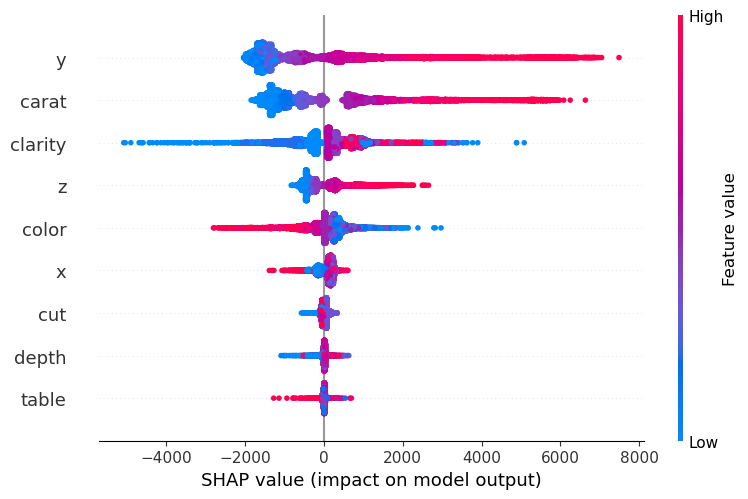

In [37]:
import shap

# Assuming 'pipeline_xgb' is your XGBoost model pipeline and it includes a scaler and the model
# Get the model from the pipeline
xgb_model = pipeline_xgb.named_steps['xgb']

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
X_test_transformed = pipeline_xgb.named_steps['scalar6'].transform(X_test)  # Transform features similar to how it was done in the pipeline

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Visualize the SHAP values (for example, summary plot)
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test.columns)


>Carat:

The SHAP values for carat are mostly positive and spread far to the right, suggesting a strong positive impact on the model's predictions, consistent with the understanding that larger carats typically lead to higher prices.

>Y and Z Dimensions: 

These features also show a significant spread to the right, indicating they often increase the predicted values. High values of y and z are associated with larger diamonds, correlating with higher prices.

>Clarity: 

Shows a spread across both positive and negative values but with a cluster around lower impact, indicating that clarity varies in its effect on price depending on other features and interactions.

>Color and Cut: 

These features show impacts that span both positive and negative but are mostly centered near zero, suggesting a less consistent or significant impact on the model's output compared to features like carat or dimensions.

>Depth and Table: 

Have a narrower spread of SHAP values, mostly around zero, indicating they have a relatively low impact on the prediction of diamond prices in this model.

The SHAP summary plot highlights how each feature influences the model's prediction, where features like carat and dimensions (y and z) generally increase diamond prices, while others like depth and table show less influence. 

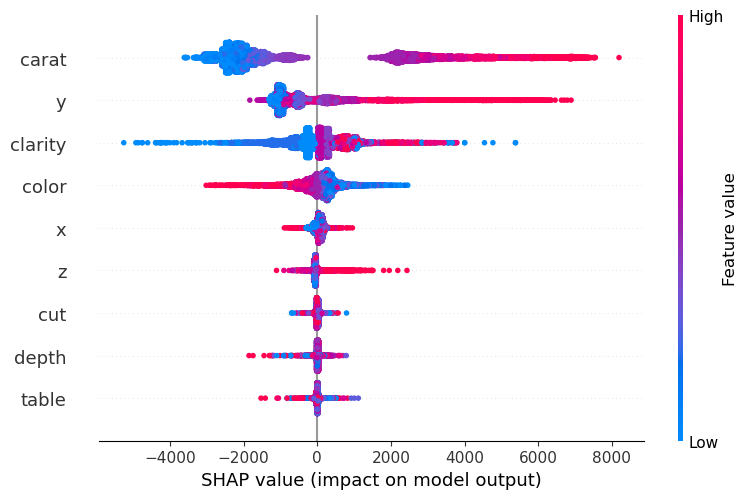

In [46]:
# Assuming 'pipeline_dt' is your Decision Tree pipeline and it includes a scaler and the model
dt_model = pipeline_dt.named_steps['dt']

# If your pipeline includes a scaler, you should transform your data before computing SHAP values
X_train_transformed = pipeline_dt.named_steps['scalar3'].transform(X_train)
X_test_transformed = pipeline_dt.named_steps['scalar3'].transform(X_test)
# Create a SHAP Tree Explainer for the Decision Tree model
explainer = shap.TreeExplainer(dt_model)

# Calculate SHAP values for the transformed test set
shap_values = explainer.shap_values(X_test_transformed)
# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test.columns)


>Carat: 

This feature has a significant positive impact on the model's predictions, as shown by the spread of dots primarily towards the positive side, similar to the `XGBoost model`.

>Y (Dimension):

The y dimension, like carat, primarily shows positive impacts, with its SHAP values spread considerably on the right side.

>Clarity and Color: 

These have a mixed impact with clusters of dots around zero, indicating a varying influence on the model's prediction, depending on the specific sample.

>X, Z (Dimensions): 

The influence of `x` and `z` dimensions is centered closer to zero but shows some variability, indicating their inconsistent impact on predictions.

>Cut, Depth, Table: 

These features show minimal influence with a more clustered distribution around zero. The variability in SHAP values for cut is narrower compared to the XGBoost model, suggesting a more consistent albeit small influence in the Decision Tree model.

>Feature Influence: 

Both models highlight `carat` and `y` as significant predictors, but the distribution of SHAP values in the Decision Tree might be less extreme or less spread out compared to the XGBoost model, which could indicate a more constrained range of influence or simpler interactions captured due to the nature of the model (a single tree versus a gradient boosting approach).

>Variability and Model Complexity: 

XGBoost tends to capture more complex patterns and interactions, evident from the wider and more variable spread in SHAP values. In contrast, the Decision Tree model typically shows a more straightforward, less variable influence of features on predictions.

The SHAP plot for the Decision Tree model offers insights into the predictive dynamics within a simpler model structure. Features like **carat** and **y** have a clear positive influence, while other features show less consistency in their impact.

In [39]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 330.3 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/275.7 kB 751.6 kB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=e2255b467e0cd7b6572f09687e49267e171ae0b2a23258812de4f7322a77104b
  Stored in directory: c:\users\bmurugesan1\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [51]:
from lime import lime_tabular

# Create a function to make predictions with your XGBoost pipeline, ensuring to include data transformations.
def pipeline_predict(input_data):
    return pipeline_xgb.predict(input_data)

# Initialize the LIME explainer for tabular data. We use the training data to generate the surrogate model.
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),  # Convert DataFrame to NumPy array if not already in that format.
    feature_names=X_train.columns.tolist(),  # Column names as list.
    class_names=['Price'],  # Output variable name, assuming it's price prediction.
    mode='regression'  # For regression models.
)

# Choose an instance from your test set to explain. Here, using the first instance as an example:
instance = X_test.iloc[1].to_numpy()  # Ensure to convert the instance into a NumPy array.

# Generate the LIME explanation for the selected instance.
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=pipeline_predict  # Use the prediction function we defined.
)


In [52]:
exp.show_in_notebook(show_table=True, show_all=False)

>Positive Influences:

**Carat** `(> 1.04)`: This feature has the highest positive contribution `(4472.6)` to the model's prediction, suggesting that higher carat weights significantly increase the predicted value of the diamond.
**Y** `(> 6.54)` and **Z** `(> 4.03)`: Dimensions of the diamond also play a substantial role, with larger dimensions contributing to a higher value.
**Clarity** `(2.00 <= clarity <= 4.00)`: This range of clarity is positively impacting the model's prediction, indicating that diamonds within this clarity range are valued higher by the model.

>Negative Influences:

**Table** `(> 59.00)`: This has a relatively minor negative influence `(-48.82)` on the prediction, suggesting that a larger table might slightly decrease the diamond's value.
**Cut** `(> 3.00)`: Similarly, a higher cut grade slightly decreases the predicted value, though the impact is minor `(-22.63)`.

The visualization indicates that for this particular diamond, features like carat, dimensions (y and z), and clarity are the primary drivers of its high valuation by the model, while table and cut have lesser, negative impacts. 

In [55]:
# Function to apply the pipeline to new data for LIME
def pipeline_dt_predict(data):
    return pipeline_dt.predict(data)
# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),  # Convert DataFrame to numpy array if not already
    feature_names=X_train.columns.tolist(),  # Convert column names to list
    class_names=['Price'],  # Specify the class names, adjust if necessary
    mode='regression'  # Use 'regression' because it's a regression problem
)
# Select an instance to explain
instance = X_test.iloc[5].to_numpy()  # Ensure it's a numpy array

# Generate LIME explanation for this instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=pipeline_dt_predict  # Use the pipeline predict function we defined
)


In [56]:
exp.show_in_notebook(show_table=True, show_all=False)

>Positive Influences:

**Carat** `(> 1.04)`: This feature has the highest positive contribution `(6014.6)` to the model's prediction. As in most models predicting diamond prices, the weight of the diamond (carat) has the most significant influence on increasing the value.
**Y** `(> 6.54)`: The dimension y has a substantial positive effect `(1686.73)`, similar to what we observed in the XGBoost model, indicating a consistent pattern across different models where larger diamond dimensions correlate with higher values.
**Clarity** `(2.00 <= clarity <= 4.00)`: High clarity significantly contributes positively `(1073.83)`, reinforcing clarity's role in enhancing the diamond's valuation.

>Negative Influences:

**Color** `(<= 1.00)`: This feature has a notable negative impact `(-853.09)` on the predicted value. A color value of 0 typically indicates a higher grade (colorless), which is paradoxically showing a negative impact here, possibly due to interactions with other features.
`Z (> 4.03)` and `X (> 6.54)`: Though these dimensions generally increase value, their lesser negative contributions suggest that in specific combinations with other features, they might not always enhance value or might be overshadowed by other, more influential negative features.

>Comparison to XGBoost Model:

The contributions and how they affect the prediction in a Decision Tree are generally more straightforward and less nuanced than in an XGBoost model. Decision Trees tend to provide more clear-cut decisions based on threshold values, while XGBoost can capture complex patterns and interactions through an ensemble approach.Understanding how different models process the same data can offer insights into the strengths and weaknesses of each modeling approach, especially for stakeholders who might rely on these predictions for pricing or valuation decisions.

### Referrences

>https://www.kaggle.com/code/surajjha101/regression-models-diamond-price-prediction/input

>Session 1 & Session 2 class notes

> ChatGPT